In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../software')

In [2]:

import pandas
import seaborn
import numpy
np = numpy

from analysis import load_files

In [3]:

data = load_files('../data/one')
print(data.shape)
data.head(5)

(1840, 23)


,ch_FZ,ch_FY,ch_FXL,ch_NIR,ch_VIS1_TL,ch_VIS1_BR,ch_F2,ch_F3,ch_F4,ch_F6,...,ch_F7,ch_F8,ch_F5,ch_VIS3_TL,ch_VIS3_BR,datapoint,filename,experiment,lux,colortemp
0,1571,5773,7593,1333,2863,7591,1263,1795,7594,1572,...,2864,7593,1264,1795,7595,0,one_2500k_309lux.npy,one,309,2500
1,5034,1670,17984,2032,7307,17984,5959,1750,17984,5041,...,7308,17977,5961,1752,17979,1,one_2500k_309lux.npy,one,309,2500
2,5773,7592,1334,2862,7594,1263,1794,7593,1573,5779,...,7597,1263,1793,7595,1572,2,one_2500k_309lux.npy,one,309,2500
3,1670,17984,2032,7308,17980,5962,1750,17984,5041,1672,...,17984,5961,1751,17980,5039,3,one_2500k_309lux.npy,one,309,2500
4,7591,1333,2863,7594,1264,1795,7588,1572,5777,7597,...,1264,1795,7592,1572,5777,4,one_2500k_309lux.npy,one,309,2500


In [40]:
#sampled = data.groupby('filename', group_keys=False).sample(frac=1.0)
#sampled = data.groupby('filename', group_keys=False).sample(frac=1.0)
sampled = data.groupby('filename', group_keys=False).apply(lambda df: df.head(7).tail(1))
avg = sampled.groupby('filename').agg('median', numeric_only=True)
#avg = data.groupby('filename').agg('median', numeric_only=True)
avg.head()

/tmp/ipykernel_31032/2742644503.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled = data.groupby('filename', group_keys=False).apply(lambda df: df.head(7).tail(1))


,ch_FZ,ch_FY,ch_FXL,ch_NIR,ch_VIS1_TL,ch_VIS1_BR,ch_F2,ch_F3,ch_F4,ch_F6,...,ch_VIS2_BR,ch_F1,ch_F7,ch_F8,ch_F5,ch_VIS3_TL,ch_VIS3_BR,datapoint,lux,colortemp
filename,,,,,,,,,,,,,,,,,,,,,
one_2500k_100lux.npy,87.0,560.0,2131.0,25.0,208.0,2130.0,274.0,1519.0,2132.0,87.0,...,2132.0,25.0,208.0,2132.0,274.0,1518.0,2130.0,6.0,100.0,2500.0
one_2500k_1lux.npy,2.0,8.0,19.0,1.0,9.0,19.0,5.0,10.0,19.0,3.0,...,19.0,1.0,9.0,19.0,5.0,10.0,19.0,6.0,1.0,2500.0
one_2500k_204lux.npy,459.0,1418.0,4503.0,367.0,720.0,4503.0,737.0,3311.0,4508.0,457.0,...,4507.0,366.0,720.0,4503.0,738.0,3310.0,4509.0,6.0,204.0,2500.0
one_2500k_309lux.npy,1333.0,2862.0,7596.0,1265.0,1795.0,7590.0,1571.0,5774.0,7596.0,1334.0,...,7596.0,1265.0,1796.0,7590.0,1572.0,5774.0,7598.0,6.0,309.0,2500.0
one_2500k_408lux.npy,2266.0,4329.0,10593.0,2230.0,2916.0,10592.0,2433.0,8192.0,10601.0,2266.0,...,10597.0,2229.0,2920.0,10593.0,2433.0,8196.0,10599.0,6.0,408.0,2500.0


['ch_FZ', 'ch_FY', 'ch_FXL', 'ch_F2', 'ch_F3', 'ch_F4', 'ch_F6', 'ch_F1', 'ch_F7', 'ch_F8', 'ch_F5']
Fitting 5 folds for each of 25 candidates, totalling 125 fits
grid result columns ['mean_fit_time', 'mean_score_time', 'mean_test_mae', 'mean_test_num_nonzero', 'mean_test_r2', 'mean_test_rmse', 'mean_test_sparsity_pct', 'mean_train_mae', 'mean_train_num_nonzero', 'mean_train_r2', 'mean_train_rmse', 'mean_train_sparsity_pct', 'param_regressor__alpha', 'params', 'rank_test_mae', 'rank_test_num_nonzero', 'rank_test_r2', 'rank_test_rmse', 'rank_test_sparsity_pct', 'split0_test_mae', 'split0_test_num_nonzero', 'split0_test_r2', 'split0_test_rmse', 'split0_test_sparsity_pct', 'split0_train_mae', 'split0_train_num_nonzero', 'split0_train_r2', 'split0_train_rmse', 'split0_train_sparsity_pct', 'split1_test_mae', 'split1_test_num_nonzero', 'split1_test_r2', 'split1_test_rmse', 'split1_test_sparsity_pct', 'split1_train_mae', 'split1_train_num_nonzero', 'split1_train_r2', 'split1_train_rmse', 'spl

/home/jon/projects/embeddedml/handson/luxmeter/notebooks/../software/train.py:356: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


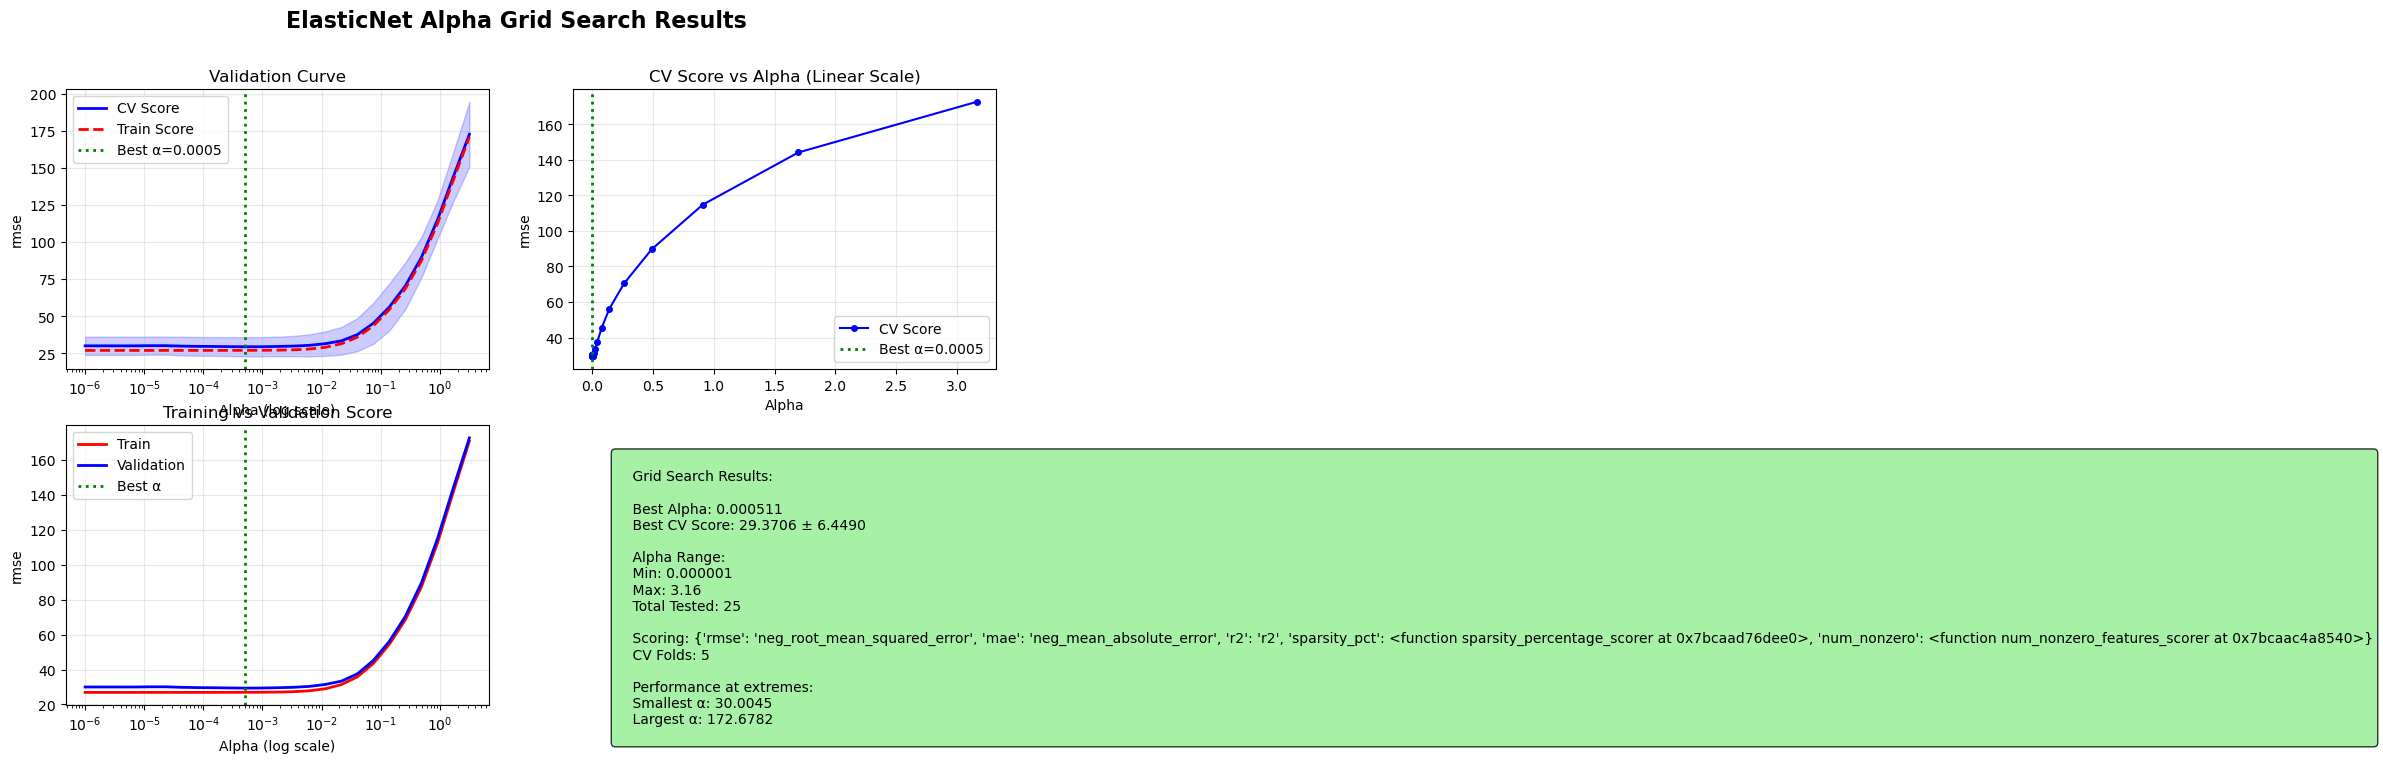

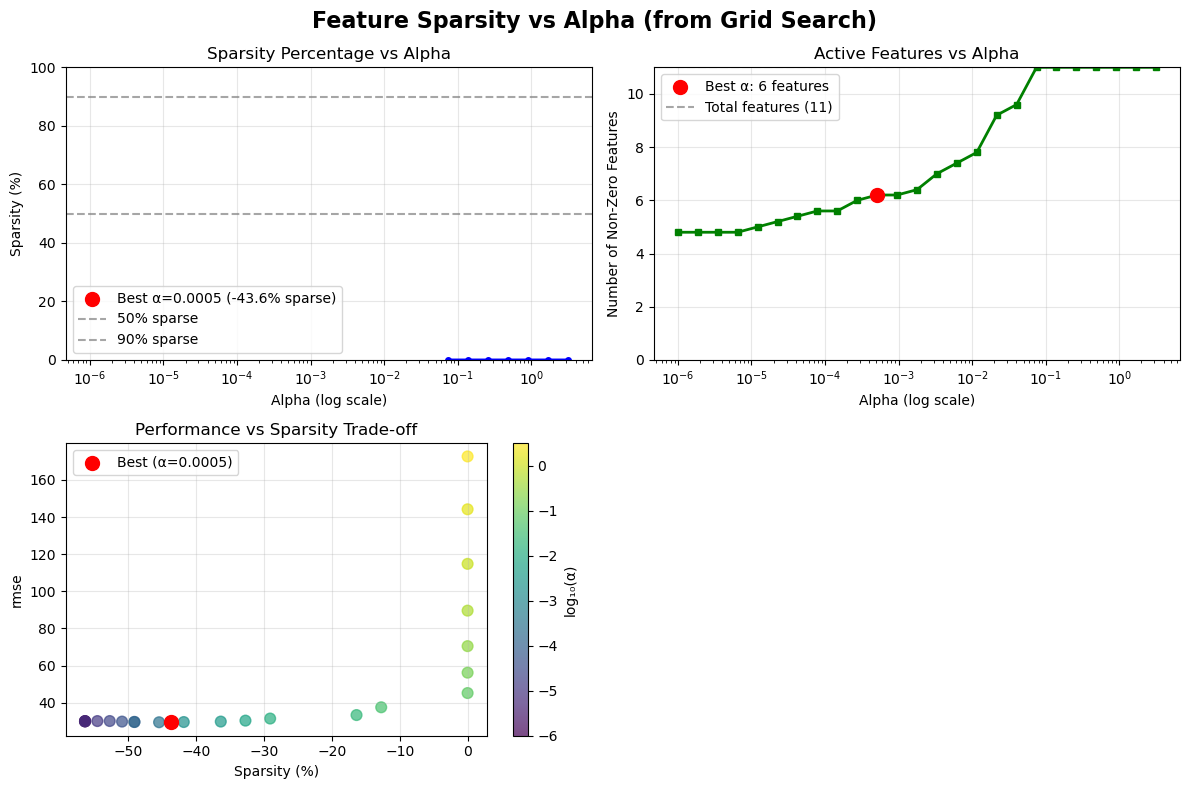

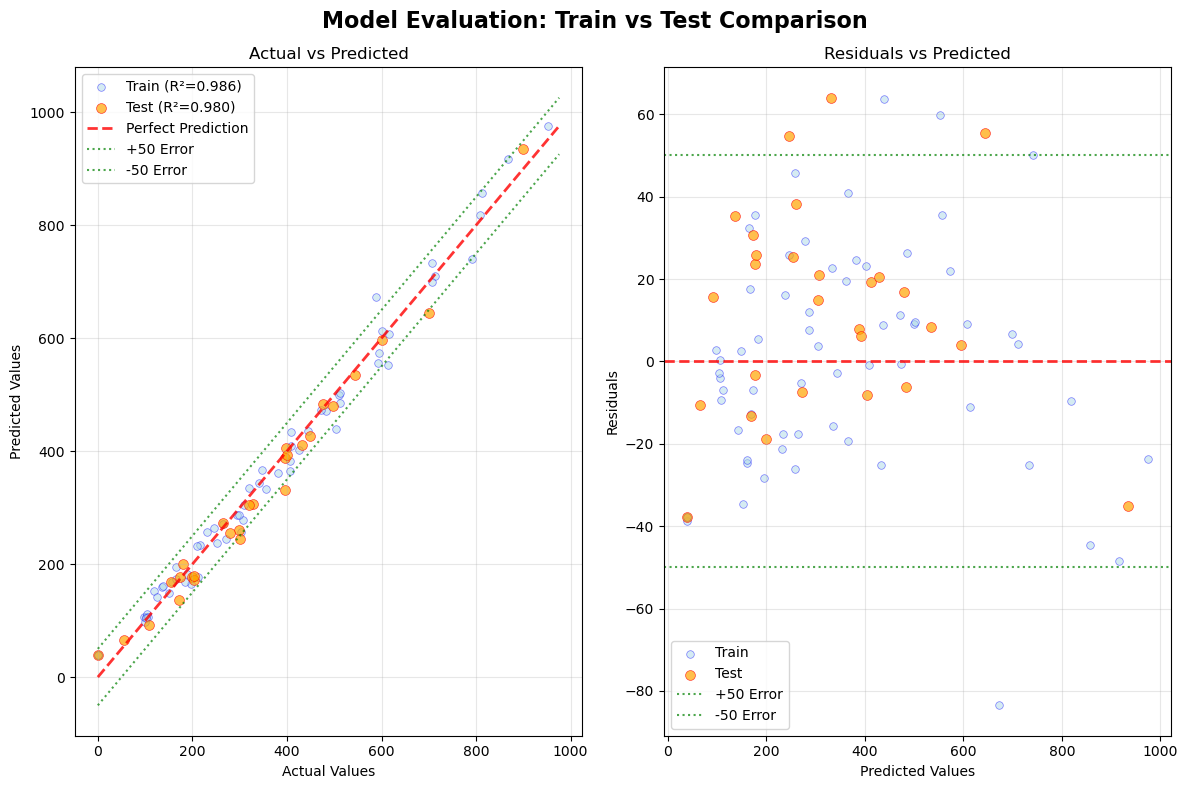


Metrics Comparison:
Metric                    Train        Test         Difference  
-----------------------------------------------------------------
R² Score                  0.9862       0.9799       0.0063      
RMSE                      27.2553      27.6115      0.3562      
Mean Absolute Error       21.3761      22.4470      1.0709      
Sample Size               64           28          


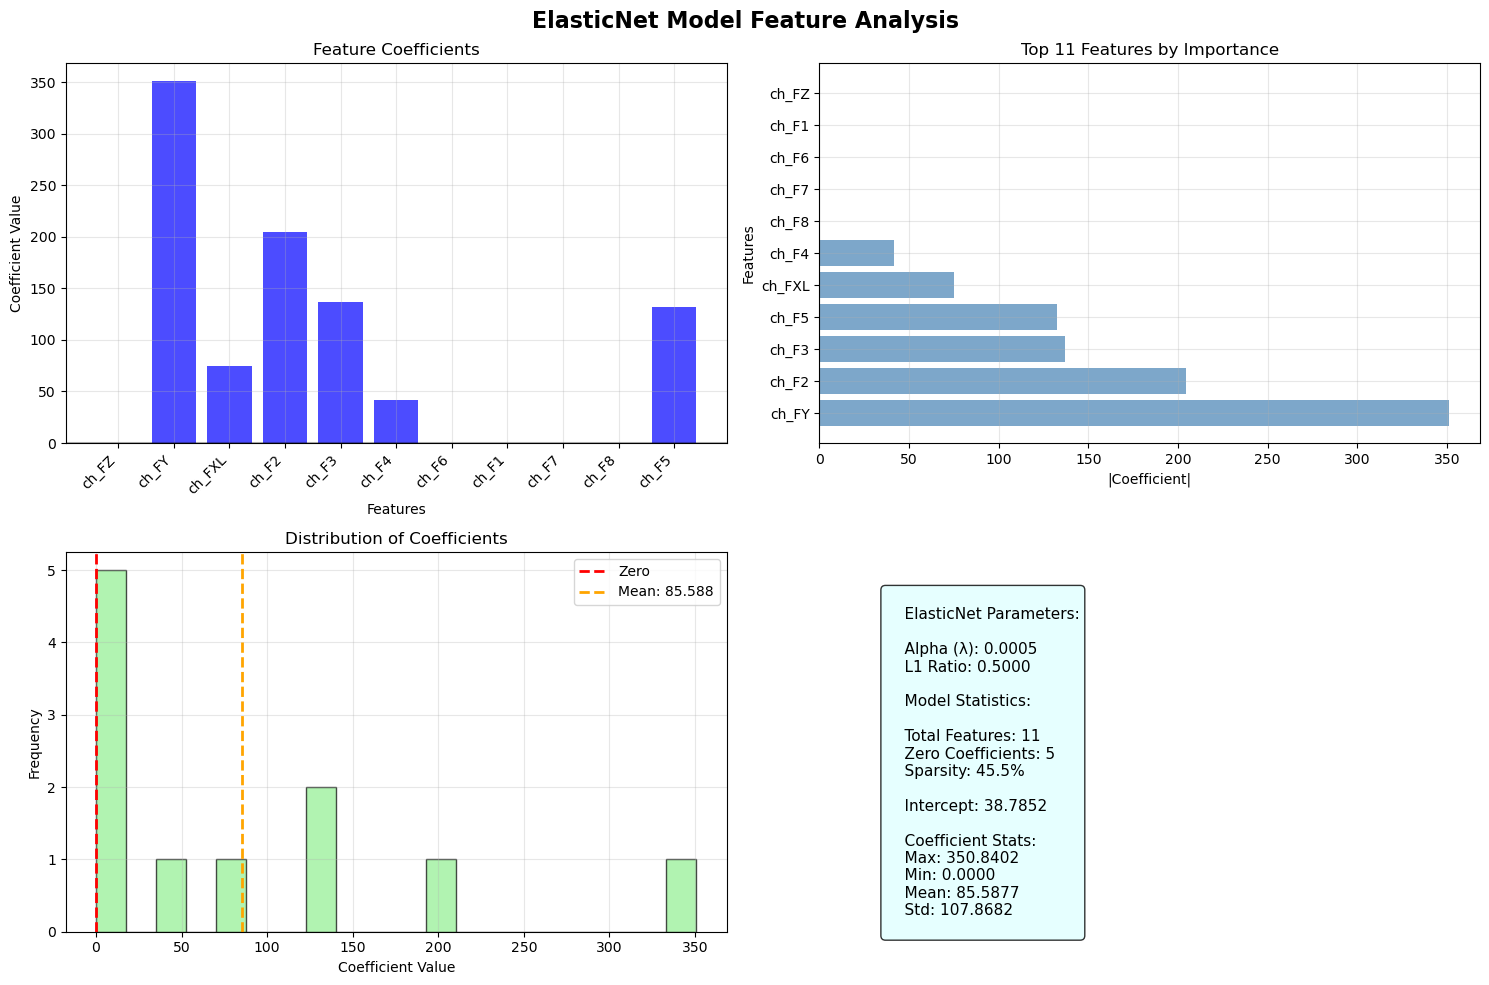

NameError: name 'scores' is not defined

In [41]:

from train import create_pipeline, evaluate_pipeline

features = [ c for c in data.columns if 'ch_F' in c]
print(features)
#sub = avg[avg.colortemp == 2500]
sub = avg.copy()
X = sub[features] / 1000.0
y = sub['lux']

est = create_pipeline()
scores = evaluate_pipeline(est, X, y)

scores

Wrote one_averaged.png


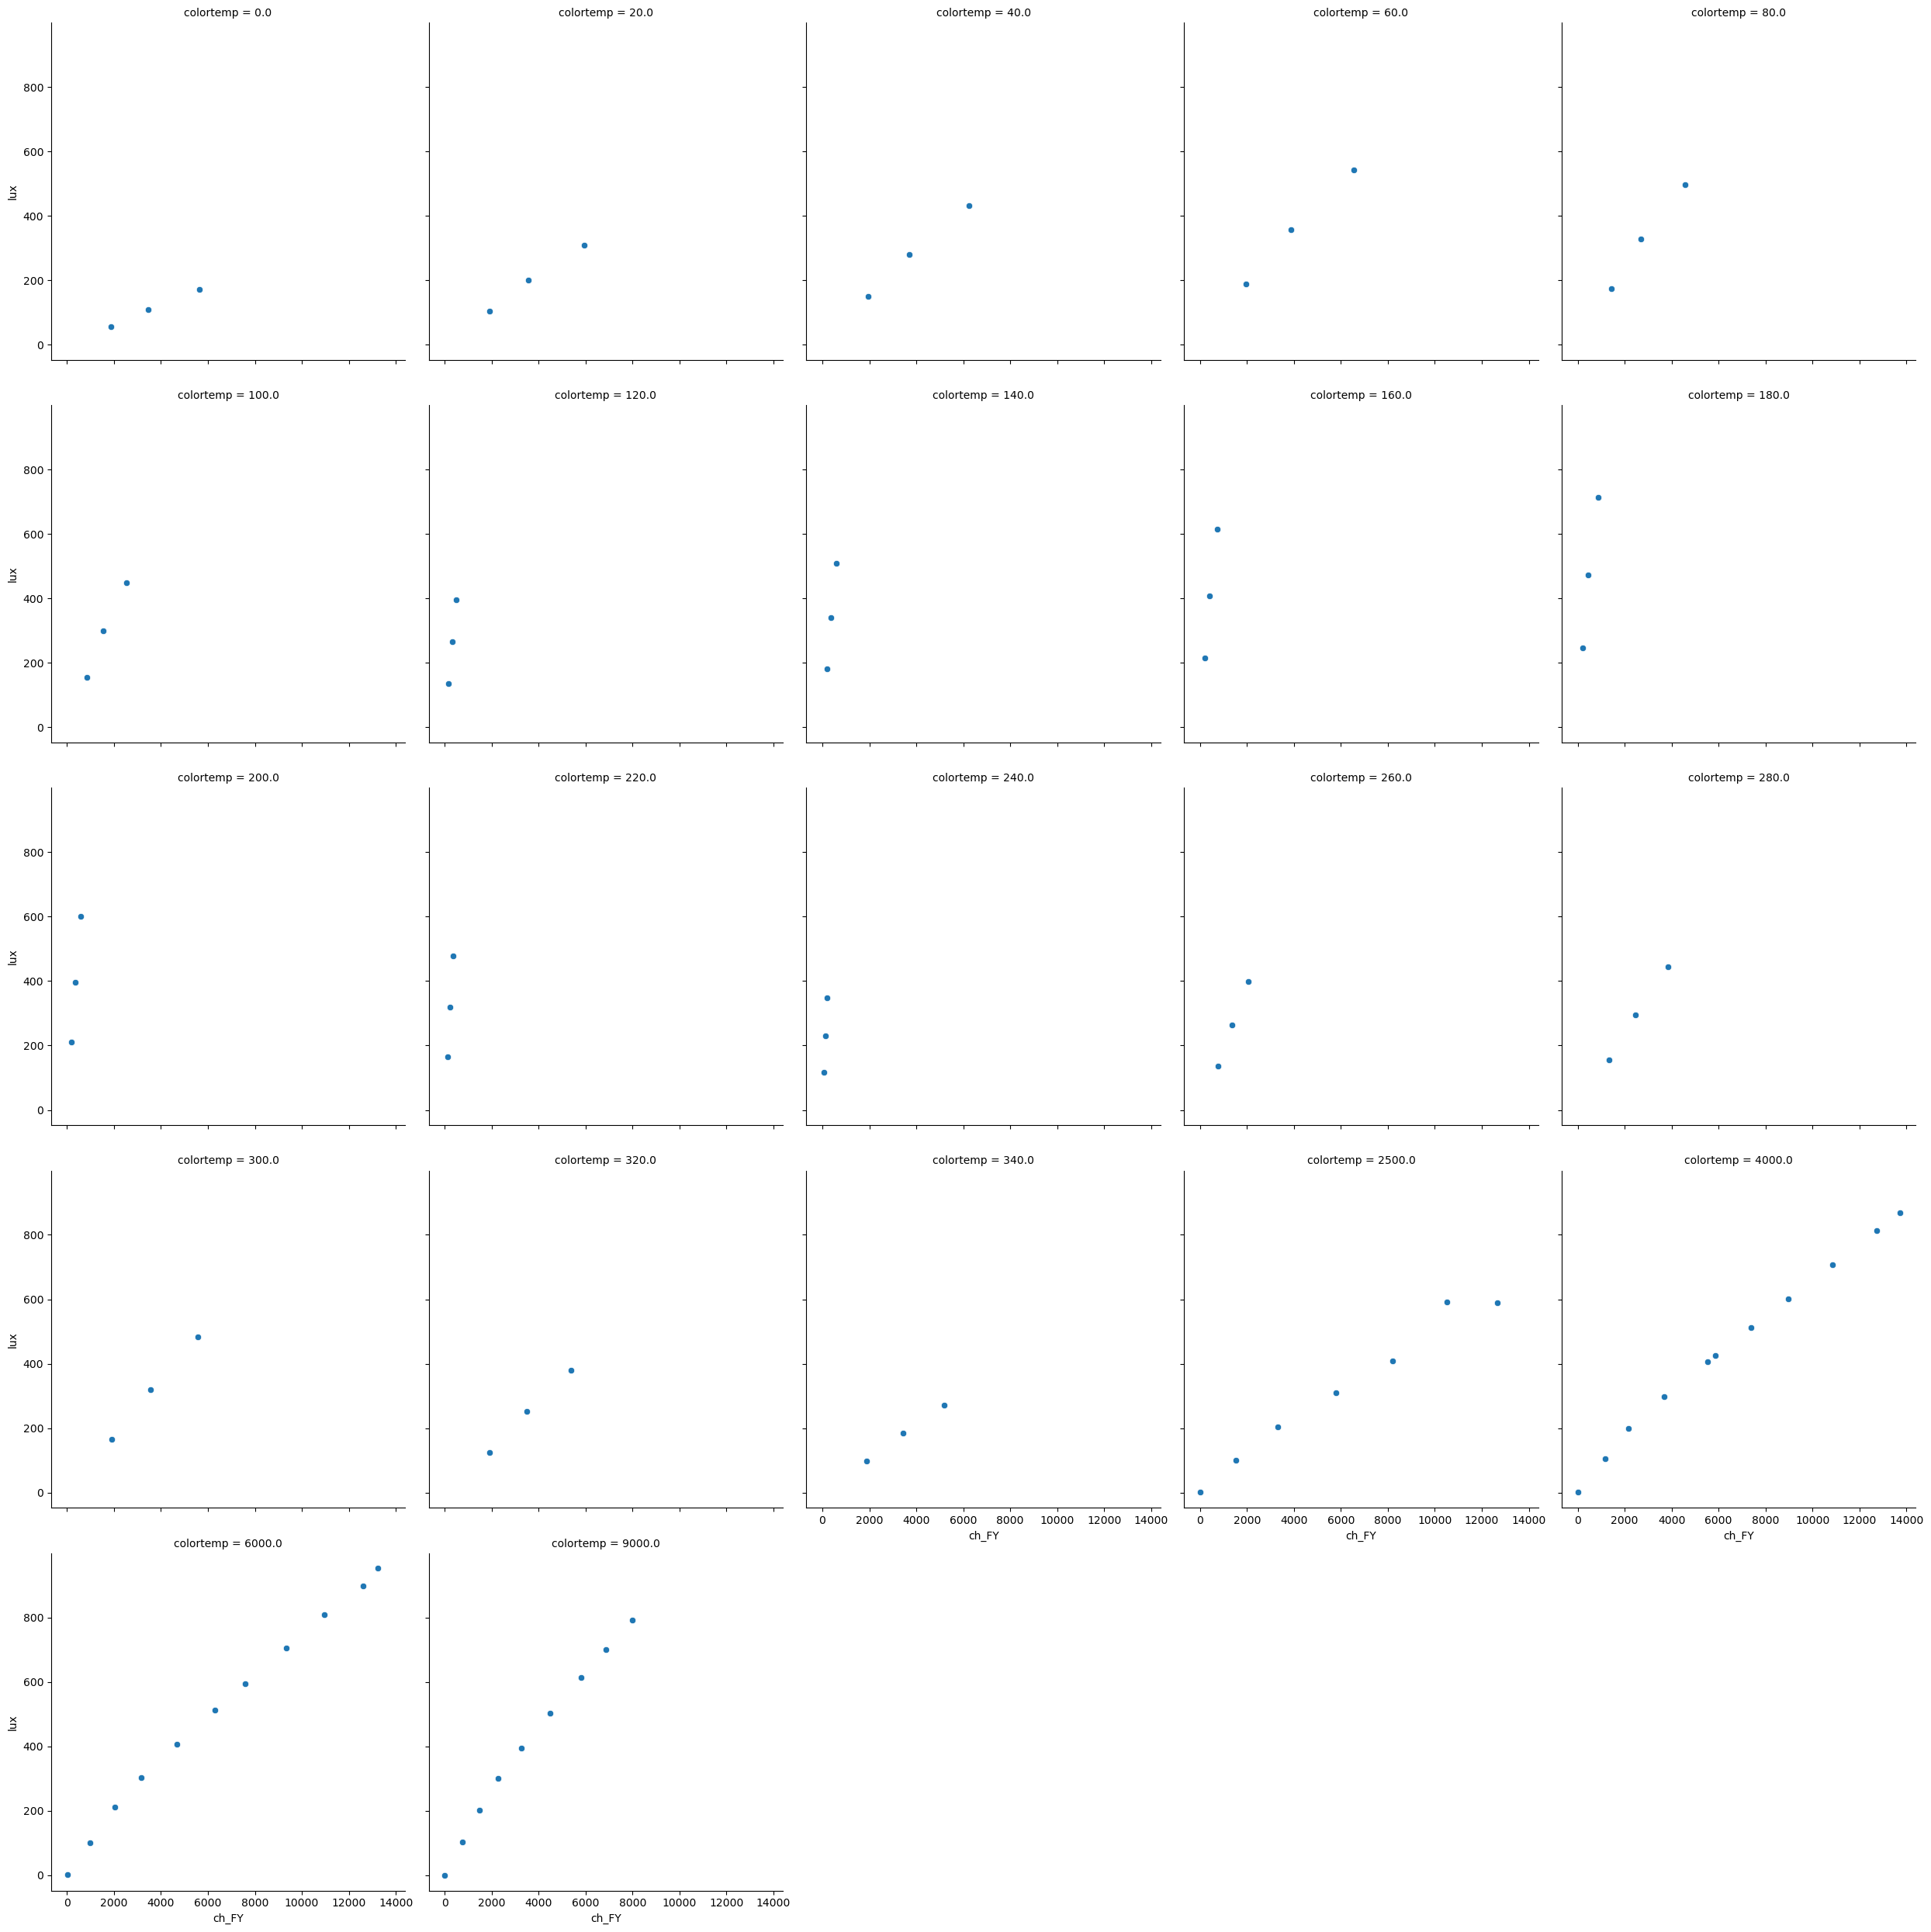

In [20]:
g = seaborn.relplot(data=avg, x='ch_FY', y='lux', col='colortemp', col_wrap=5)
fig = g.figure
plot_path = 'one_averaged.png'
fig.savefig(plot_path)
print('Wrote', plot_path)